In [2]:
import numpy as np


def entropy(y):
    """
    计算信息熵
    :param y: 数据集的目标值
    :return: 信息熵
    """
    _, counts = np.unique(y, return_counts=True)
    prob = counts / y.size
    return -np.sum(prob * np.log2(prob))


def info_gain(x, y):
    """
    计算信息增益
    :param x: 给定的特征
    :param y: 数据集的目标值
    :return: 信息增益
    """
    values, counts = np.unique(x, return_counts=True)
    new_entropy = 0
    for i, value in enumerate(values):
        prob = counts[i] / x.size
        new_entropy += prob * entropy(y[x == value])
    return entropy(y) - new_entropy

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=3)
print(f'H(D)    = {entropy(y_train)}')
print(f'g(D,A0) = {info_gain(X_train[:, 0], y_train)}')
print(f'g(D,A1) = {info_gain(X_train[:, 1], y_train)}')
print(f'g(D,A2) = {info_gain(X_train[:, 2], y_train)}')
print(f'g(D,A3) = {info_gain(X_train[:, 3], y_train)}')

H(D)    = 1.584962500721156
g(D,A0) = 0.9430813063736728
g(D,A1) = 0.5692093930591595
g(D,A2) = 1.4475439590905472
g(D,A3) = 1.4420095891994646


In [4]:
def info_gain_ratio(x, y):
    """
    计算信息增益比
    :param x: 给定的特征
    :param y: 数据集的目标值
    :return: 信息增益比
    """
    return info_gain(x, y) / entropy(x)


print(f'R(D,A0) = {info_gain_ratio(X_train[:, 0], y_train)}')
print(f'R(D,A1) = {info_gain_ratio(X_train[:, 1], y_train)}')
print(f'R(D,A2) = {info_gain_ratio(X_train[:, 2], y_train)}')
print(f'R(D,A3) = {info_gain_ratio(X_train[:, 3], y_train)}')

R(D,A0) = 0.19687406476459068
R(D,A1) = 0.14319788821311977
R(D,A2) = 0.28837763858461984
R(D,A3) = 0.35550822529855447


基尼指数

In [5]:
def gini_index(y):
    """
    计算基尼指数
    :param y: 数据集的目标值
    :return: 基尼指数
    """
    _, counts = np.unique(y, return_counts=True)
    return 1 - np.sum((counts / y.size) ** 2)


def gini_with_feature(x, y):
    """
    计算给定特征后的基尼指数
    :param x: 给定的特征
    :param y: 数据集的目标值
    :return: 给定特征后的基尼指数
    """
    values, counts = np.unique(x, return_counts=True)
    gini = 0
    for value in values:
        prob = x[x == value].size / x.size
        gini += prob * gini_index(y[x == value]) 
    return gini


print(f'G(D)    = {gini_index(y_train)}')
print(f'G(D,A0) = {gini_with_feature(X_train[:, 0], y_train)}')
print(f'G(D,A1) = {gini_with_feature(X_train[:, 1], y_train)}')
print(f'G(D,A2) = {gini_with_feature(X_train[:, 2], y_train)}')
print(f'G(D,A3) = {gini_with_feature(X_train[:, 3], y_train)}')

G(D)    = 0.6666666666666667
G(D,A0) = 0.29187830687830685
G(D,A1) = 0.44222582972582963
G(D,A2) = 0.06081349206349207
G(D,A3) = 0.06249999999999998


In [6]:
from sklearn.tree import DecisionTreeClassifier

# 创建模型
model = DecisionTreeClassifier()
# 训练模型
model.fit(X_train, y_train)
# 预测结果
y_pred = model.predict(X_test)

In [7]:
from sklearn.metrics import classification_report

print(y_test)
print(y_pred)
print(classification_report(y_test, y_pred))

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1]
[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 2 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



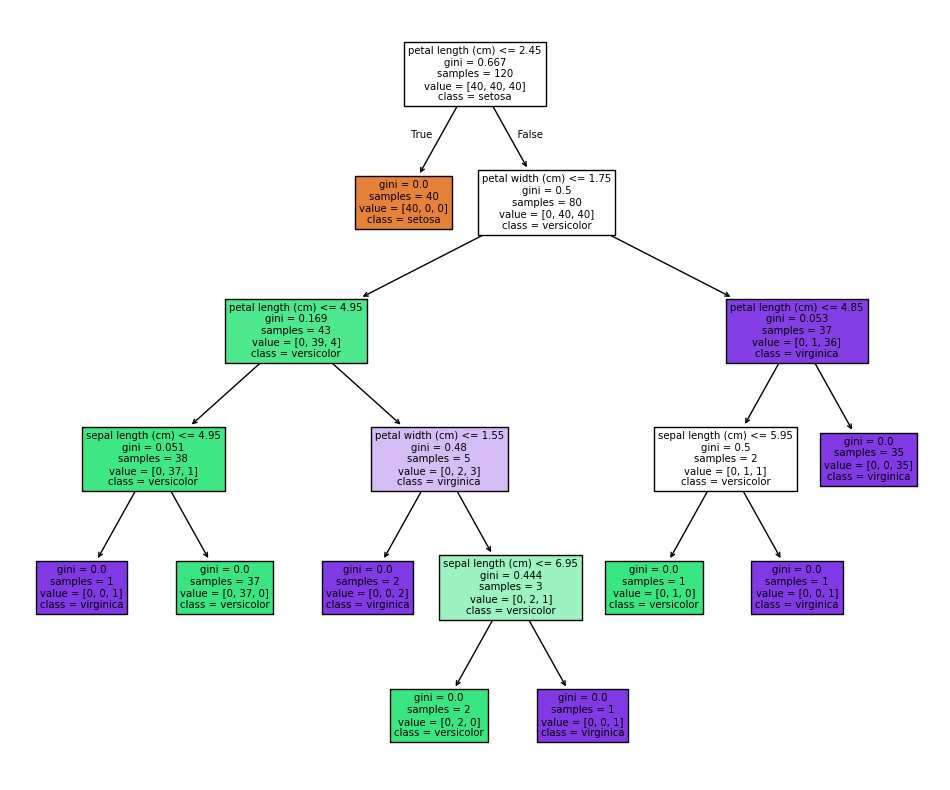

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 10))
plot_tree(
    decision_tree=model,               # 决策树模型
    feature_names=iris.feature_names,  # 特征的名称
    class_names=iris.target_names,     # 标签的名称
    filled=True                        # 用颜色填充
)
plt.show()

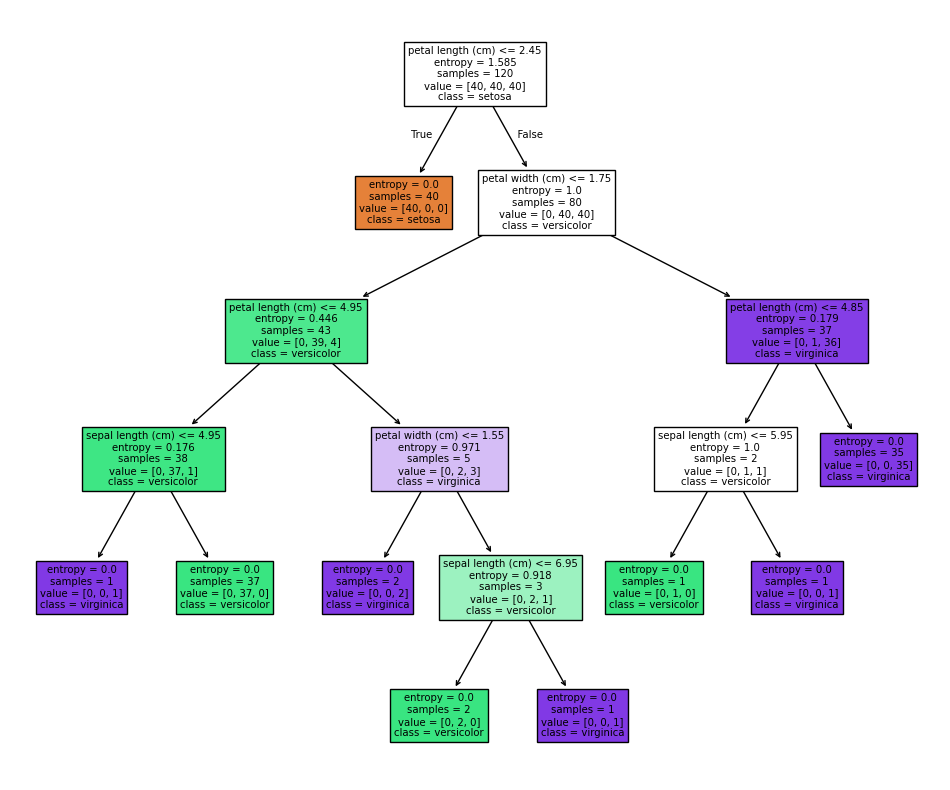

In [9]:
# 创建模型
model = DecisionTreeClassifier(
    criterion='entropy',
    ccp_alpha=0.01,
    
)
# 训练模型
model.fit(X_train, y_train)
# 可视化
plt.figure(figsize=(12, 10))
plot_tree(
    decision_tree=model,               # 决策树模型
    feature_names=iris.feature_names,  # 特征的名称
    class_names=iris.target_names,     # 标签的名称
    filled=True                        # 用颜色填充
)
plt.show()

In [10]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={
        'criterion': ['gini', 'entropy'],
        'max_depth': np.arange(5, 10),
        'max_features': [None, 'sqrt', 'log2'],
        'min_samples_leaf': np.arange(1, 11),
        'max_leaf_nodes': np.arange(5, 15)
    },
    cv=5
)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([5, 6, 7, 8, 9]),
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

随机森林

In [11]:
from sklearn.ensemble import RandomForestClassifier

gs = GridSearchCV(
    estimator=RandomForestClassifier(n_jobs=-1),
    param_grid={
        'n_estimators': [50, 100, 150],
        'criterion': ['gini', 'entropy'],
        'max_depth': np.arange(5, 10),
        'max_features': ['sqrt', 'log2'],
        'min_samples_leaf': np.arange(1, 11),
        'max_leaf_nodes': np.arange(5, 15)
    },
    cv=5
)
gs.fit(X_train, y_train)

KeyboardInterrupt: 